<Observer: name='CTIO',
    location (lon, lat, el)=(-70.81500000000001 deg, -30.165277777777778 deg, 2214.999999999373 m),
    timezone=<DstTzInfo 'Africa/Johannesburg' LMT+1:52:00 STD>>
<Observer: name='KMTNET',
    location (lon, lat, el)=(149.06119444444445 deg, -31.273361111111104 deg, 1149.0000000004277 m),
    timezone=<DstTzInfo 'Australia/Sydney' LMT+10:05:00 STD>>
[  0  30  60  90 120 150 180 210 240 270 300 330 360]
[-90 -70 -50 -30 -10  10  30  50  70  90]
720.0
Night only observation for CTIO observatory only
Mulitiple ranges of Co-Vis time for ra=0.0 and dec=-90.0 in minutes: 360 mins
Night only observation for CTIO observatory only
Mulitiple ranges of Co-Vis time for ra=0.0 and dec=-70.0 in minutes: 340 mins
Night only observation for CTIO observatory only
Mulitiple ranges of Co-Vis time for ra=0.0 and dec=-50.0 in minutes: 200 mins
Night only observation for CTIO observatory only
Mulitiple ranges of Co-Vis time for ra=0.0 and dec=-30.0 in minutes: 120 mins
Night only ob

/usr/lib/python3/dist-packages/ipykernel_launcher.py:244: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Night only observation for CTIO observatory only
No Co-Vis:Total time co-observable for 180.0 and -50.0 in minutes: 0 mins
Night only observation for CTIO observatory only
No Co-Vis:Total time co-observable for 180.0 and -30.0 in minutes: 0 mins
Night only observation for CTIO observatory only
No Co-Vis:Total time co-observable for 180.0 and -10.0 in minutes: 0 mins
Night only observation for CTIO observatory only
No Co-Vis:Total time co-observable for 180.0 and 10.0 in minutes: 0 mins
Night only observation for CTIO observatory only
No Co-Vis:Total time co-observable for 180.0 and 30.0 in minutes: 0 mins
Night only observation for CTIO observatory only
No Co-Vis:Total time co-observable for 180.0 and 50.0 in minutes: 0 mins
Night only observation for CTIO observatory only
No Co-Vis:Total time co-observable for 180.0 and 70.0 in minutes: 0 mins
Night only observation for CTIO observatory only
No Co-Vis:Total time co-observable for 180.0 and 90.0 in minutes: 0 mins
Night only observatio

Night only observation for CTIO observatory only
No Co-Vis:Total time co-observable for 0.0 and 30.0 in minutes: 0 mins
Night only observation for CTIO observatory only
No Co-Vis:Total time co-observable for 0.0 and 50.0 in minutes: 0 mins
Night only observation for CTIO observatory only
No Co-Vis:Total time co-observable for 0.0 and 70.0 in minutes: 0 mins
Night only observation for CTIO observatory only
No Co-Vis:Total time co-observable for 0.0 and 90.0 in minutes: 0 mins
[[360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360. 360.]
 [340. 300. 180.  60.   0.  80. 100.  80.   0.   0. 100. 220. 340.]
 [200. 200.  80.   0.   0.   0.   0.   0.   0.   0.   0. 120. 200.]
 [120. 120.  40.   0.   0.   0.   0.   0.   0.   0.   0.  80. 120.]
 [ 20.  20.   0.   0.   0.   0.   0.   0.   0.   0.   0.  20.  20.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   

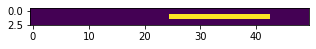

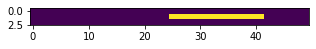

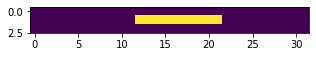

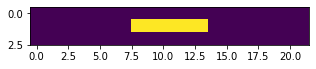

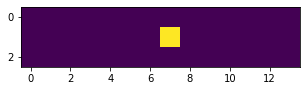

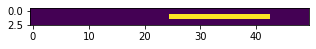

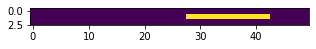

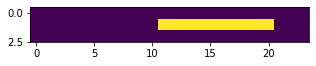

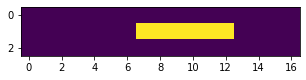

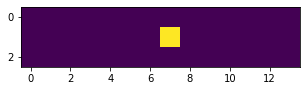

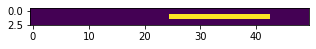

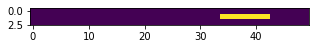

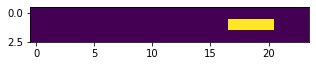

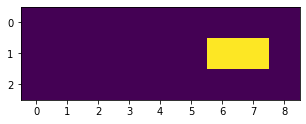

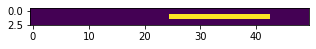

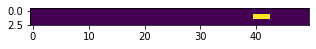

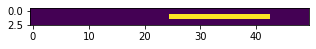

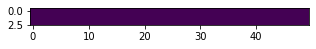

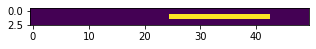

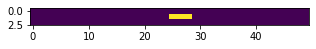

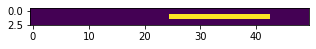

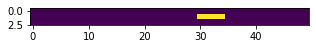

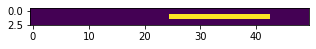

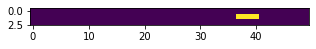

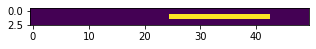

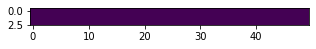

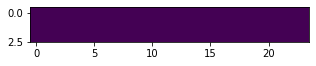

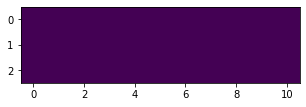

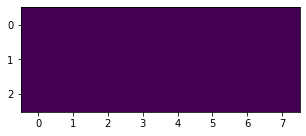

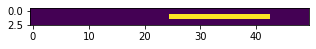

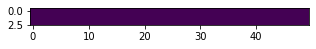

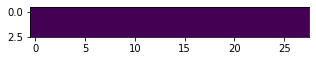

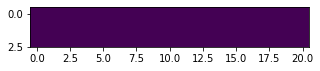

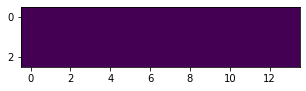

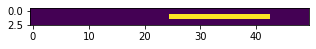

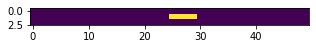

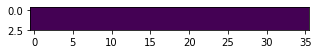

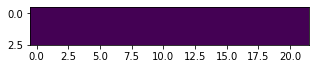

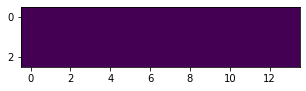

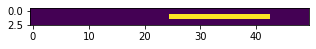

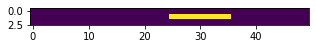

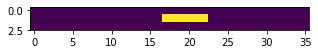

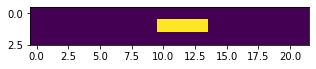

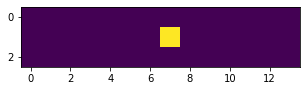

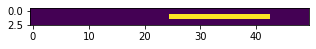

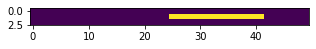

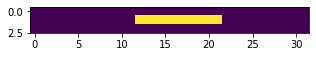

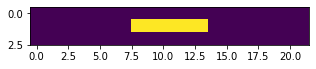

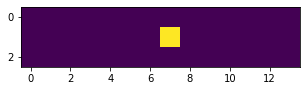

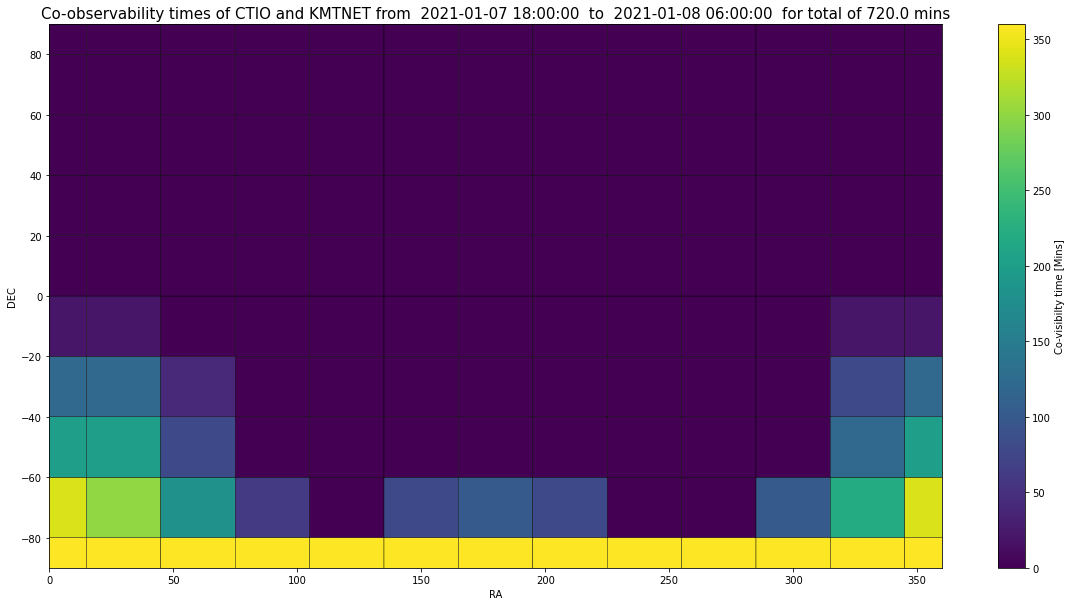

In [15]:
%%time
#load third party modules [requirements- Astropy, pandas, numpy, colorama,cv2]

from astropy.time import Time
import pandas as pd

from astropy.coordinates import EarthLocation
from astroplan import Observer,FixedTarget
from astroplan.plots import plot_airmass,plot_altitude
import astropy.units as u
from astropy.coordinates import SkyCoord

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import colorama
from colorama import Fore, Style
import cv2


pd.set_option("display.max_rows", None, "display.max_columns", None)

%matplotlib inline



#############################################################################################################

#Specify paramenters
#Co-vis type input 'max' for maximum co-vis or 'sum' for sum of all co-vis 

co_vis_type='sum' #or 'max'
RA_intervals=30
DEC_intervals=20
time_interval=20
low_airmasslim=1
high_airmasslim=3
start_date = datetime(2021,1, 7, 18, 0)
end_date = datetime(2021, 1, 8, 6, 0)

Obs1_longitude=-70.81500000000001 
Obs1_latitude=-30.165277777777778
obs1_elevation=2214.9999999993697
obs1_name='CTIO'
night_only_obs1= 'y' #'n'


obs2_longitude=149.06119444444445
obs2_latitude=-31.273361111111104
obs2_elevation=1149.0000000015516
obs2_name='KMTNET'
night_only_obs2= 'n' #'n'




##############################################################################################################

#Observatories


obs1_coordinates = EarthLocation.from_geodetic(Obs1_longitude*u.deg,Obs1_latitude*u.deg,obs1_elevation*u.m)
obs1= Observer(location=obs1_coordinates, name=obs1_name, timezone='Africa/Johannesburg')
print(obs1)


obs2_coordinates = EarthLocation.from_geodetic(obs2_longitude*u.deg,obs2_latitude*u.deg,obs2_elevation*u.m)
obs2 = Observer(location=obs2_coordinates, name=obs2_name, timezone='Australia/Sydney')
print(obs2)

#ctio = Observer.at_site("ctio", timezone = 'America/Santiago')  

#kmtnet= Observer.at_site("Siding Spring Observatory", name='KMTNET',timezone = 'Australia/Sydney')




save_location= '/home/andrew/src/Transient-Scheduler/scratch/'

###########################################################################################################
#RA&DEC 
ra=np.array(range(0, 361, RA_intervals))

dec=np.array(range(-90, 91, DEC_intervals))
x,y=np.meshgrid(ra,dec)

bb = np.zeros(np.shape(x))
print(ra)
print(dec)

###########################################################################################################
#Time intervals
from datetime import datetime, timedelta

def daterange(start_date, end_date):
    delta = timedelta(minutes=time_interval)
    while start_date < end_date:
        yield start_date
        start_date += delta
        

times=[]
for single_date in daterange(start_date, end_date):
    times.append(single_date.strftime("%Y-%m-%d %H:%M:%S"))
times1=np.array(times)

times1=times1.astype(("datetime64[ns]"))
delta=end_date-start_date
total_mins = delta.total_seconds() / 60
print(total_mins) 


############################################################################################################
#Loop through all ra and dec

for ii,r in enumerate(ra):
    for jj,d in enumerate(dec):
                
        target_coord = SkyCoord(ra=r*u.deg, dec=d*u.deg)
        target = FixedTarget(coord=target_coord, name="source")
        
        
        #Airmasses at observatory 1
        
        airmass_obs1=obs1.altaz(times, target).secz
        masked_airmass_obs1 = np.ma.array(airmass_obs1, mask=airmass_obs1 < 1)

        
        #Airmasses at observatory2
        
        airmass_obs2=obs2.altaz(times,target).secz
        masked_airmass_obs2 = np.ma.array(airmass_obs2, mask=airmass_obs2 < 1)
        
        
        xc=obs1.is_night(times)
        cc=obs2.is_night(times)
        
        
        
        
        
      
        if night_only_obs1=='y'and night_only_obs2=='y':
            print(f'Night only observation for BOTH Observatory {obs1.name.upper()} and {obs2.name.upper()}')

            dk={'datetimes':times,'night_obs1':xc,'night_obs2':cc,
                'obs1_airmass':masked_airmass_obs1,'obs2_airmass':masked_airmass_obs2}

            df1=pd.DataFrame(data=dk)

            df=df1.round(3 )# Rounding up values 
             # Dropping NaN values but maintaining indexes in case there are NANs

            df=df.dropna()
            df.reset_index(drop=True, inplace=True)
            #print(df)

            covis_list=(df[df['obs1_airmass'].between(low_airmasslim,high_airmasslim) & df['obs2_airmass'].between(low_airmasslim,high_airmasslim)])


            if len(covis_list)==0 or len(df)==0:
                mins=0
                print(f'{Fore.RED}No Co-Vis:Total time co-observable for {target_coord.ra.deg} and {target_coord.dec.deg} in minutes: {mins} mins{Style.RESET_ALL}')
                bb[jj,ii] = mins 
            else:   
                com_vals=np.array([(df['night_obs1'] == True) & (df['night_obs2'] == True)&df['obs1_airmass'].between(low_airmasslim,high_airmasslim) & df['obs2_airmass'].between(low_airmasslim,high_airmasslim)])
                
                fb=com_vals[0][:]
                p=int((len(fb))*0.2)
                nit=np.zeros(p,dtype=bool)

                yy=np.append(nit,fb) #Adding false to the beginning of the list 
                tt=np.append(yy,nit)
                gg=1*tt #converting to binary
                ff=np.zeros(len(gg)) #Generating zeros
                vls=np.array([ff,tt,ff])

                vls=vls.astype(np.uint8)
                (thresh, gray) = cv2.threshold(vls, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

                ret, labels = cv2.connectedComponents(gray)
                plt.figure(figsize=(5,5))
                plt.imshow(vls)
                k=np.unique(labels, return_counts=True)

                cb=k[1][1:]
                if len(cb)==0:
                    fullmins=0
                    print(f'{Fore.RED}No Co-Vis time for ra={target_coord.ra.deg} and dec={target_coord.dec.deg} Co-vis time: {fullmins} mins{Style.RESET_ALL}')
                    bb[jj,ii]=fullmins
                else: 

                    cvs=[]
                    for i in (cb):
                        cvs.append((time_interval*i))
                        bgr_covis=np.max(cvs)
                        total_covis=sum(cvs)

                    print(f'{Fore.GREEN}Mulitiple ranges of Co-Vis time for ra={target_coord.ra.deg} and dec={target_coord.dec.deg} in minutes: {total_covis} mins{Style.RESET_ALL}')
                    
                    if co_vis_type=='sum':
                        bb[jj,ii] = total_covis 
                    elif co_vis_type=='max':
                        bb[jj,ii] = bgr_covis 
        #########################################################################################


        elif night_only_obs1=='y'and night_only_obs2=='n':
            print(f'Night only observation for {obs1.name.upper()} observatory only')

            dk={'datetimes':times,'night_obs1':xc,'obs1_airmass':masked_airmass_obs1,'obs2_airmass':masked_airmass_obs2}
            df1=pd.DataFrame(data=dk)

            df=df1.round(3 )# Rounding up values 

            df=df.dropna()
            df.reset_index(drop=True, inplace=True)
            

            covis_list=(df[df['obs1_airmass'].between(low_airmasslim,high_airmasslim) & df['obs2_airmass'].between(low_airmasslim,high_airmasslim)])


            if len(covis_list)==0 or len(df)==0:
                mins=0
                print(f'{Fore.RED}No Co-Vis:Total time co-observable for {target_coord.ra.deg} and {target_coord.dec.deg} in minutes: {mins} mins{Style.RESET_ALL}')
                bb[jj,ii] = mins 
            else:   
                com_vals=np.array([(df['night_obs1'] == True) &df['obs1_airmass'].between(low_airmasslim,high_airmasslim) & df['obs2_airmass'].between(low_airmasslim,high_airmasslim)])
                com_vals
                fb=com_vals[0][:]
                p=int((len(fb))*0.2)
                nit=np.zeros(p,dtype=bool)

                yy=np.append(nit,fb) #Adding false to the beginning of the list 
                tt=np.append(yy,nit)
                gg=1*tt #converting to binary
                ff=np.zeros(len(gg)) #Generating zeros
                vls=np.array([ff,tt,ff])

                vls=vls.astype(np.uint8)
                (thresh, gray) = cv2.threshold(vls, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

                ret, labels = cv2.connectedComponents(gray)
                plt.figure(figsize=(5,5))
                plt.imshow(vls)
                k=np.unique(labels, return_counts=True)

                cb=k[1][1:]
                if len(cb)==0:
                    fullmins=0
                    print(f'{Fore.RED}No Co-Vis time for ra={target_coord.ra.deg} and dec={target_coord.dec.deg} Co-vis time: {fullmins} mins{Style.RESET_ALL}')
                    bb[jj,ii]=fullmins
                else: 

                    cvs=[]
                    for i in (cb):
                        cvs.append((time_interval*i))
                        bgr_covis=np.max(cvs)
                        total_covis=sum(cvs)

                    print(f'{Fore.GREEN}Mulitiple ranges of Co-Vis time for ra={target_coord.ra.deg} and dec={target_coord.dec.deg} in minutes: {total_covis} mins{Style.RESET_ALL}')  
                    if co_vis_type=='sum':
                        bb[jj,ii] = total_covis 
                    elif co_vis_type=='max':
                        bb[jj,ii] = bgr_covis 
        ####################################################################################################

        elif night_only_obs1=='n'and night_only_obs2=='y':

            print(f'Night only observation for {obs2.name.upper()} observatory only')

            dk={'datetimes':times,'night_obs2':cc,'obs1_airmass':masked_airmass_obs1,'obs2_airmass':masked_airmass_obs2}
            df1=pd.DataFrame(data=dk)

            df=df1.round(3 )# Rounding up values 
             # Dropping NaN values but maintaining indexes in case there are NANs

            df=df.dropna()#Checking the dataframe
            df.reset_index(drop=True, inplace=True)
            #print(df)

            covis_list=(df[df['obs1_airmass'].between(low_airmasslim,high_airmasslim) & df['obs2_airmass'].between(low_airmasslim,high_airmasslim)])


            if len(covis_list)==0 or len(df)==0:
                mins=0
                print(f'{Fore.RED}No Co-Vis:Total time co-observable for {target_coord.ra.deg} and {target_coord.dec.deg} in minutes: {mins} mins{Style.RESET_ALL}')
                bb[jj,ii] = mins 
            else:   
                com_vals=np.array([(df['night_obs2'] == True)&df['obs1_airmass'].between(low_airmasslim,high_airmasslim) & df['obs2_airmass'].between(low_airmasslim,high_airmasslim)])
                com_vals
                fb=com_vals[0][:]
                p=int((len(fb))*0.2)
                nit=np.zeros(p,dtype=bool)

                yy=np.append(nit,fb) #Adding false to the beginning of the list 
                tt=np.append(yy,nit)
                gg=1*tt #converting to binary
                ff=np.zeros(len(gg)) #Generating zeros
                vls=np.array([ff,tt,ff])

                vls=vls.astype(np.uint8)
                (thresh, gray) = cv2.threshold(vls, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

                ret, labels = cv2.connectedComponents(gray)
                plt.figure(figsize=(5,5))
                plt.imshow(vls)
                k=np.unique(labels, return_counts=True)

                cb=k[1][1:]
                if len(cb)==0:
                    fullmins=0
                    print(f'{Fore.RED}No Co-Vis time for ra={target_coord.ra.deg} and dec={target_coord.dec.deg} Co-vis time: {fullmins} mins{Style.RESET_ALL}')
                    bb[jj,ii]=fullmins
                else: 

                    cvs=[]
                    for i in (cb):
                        cvs.append((time_interval*i))
                        bgr_covis=np.max(cvs)
                        total_covis=sum(cvs)

                    
                    if co_vis_type=='sum':
                        print(f'{Fore.GREEN}Mulitiple ranges of Co-Vis time for ra={target_coord.ra.deg} and dec={target_coord.dec.deg} in minutes: {total_covis} mins{Style.RESET_ALL}')
                        bb[jj,ii] = total_covis 
                    elif co_vis_type=='max':
                        print(f'{Fore.GREEN}Mulitiple ranges of Co-Vis time for ra={target_coord.ra.deg} and dec={target_coord.dec.deg} in minutes: {bgr_covis} mins{Style.RESET_ALL}')
                        bb[jj,ii] = bgr_covis 
                        
                        
        elif night_only_obs1=='n'and night_only_obs2=='n':
            print(f'Night only observation not required')
            dk={'datetimes':times,'obs1_airmass':masked_airmass_obs1,'obs2_airmass':masked_airmass_obs2}
            df1=pd.DataFrame(data=dk)

            df=df1.round(3 )# Rounding up values 
             # Dropping NaN values but maintaining indexes in case there are NANs

            df=df.dropna()#Checking the dataframe
            df.reset_index(drop=True, inplace=True)
            #print(df)

            covis_list=(df[df['obs1_airmass'].between(low_airmasslim,high_airmasslim) & df['obs2_airmass'].between(low_airmasslim,high_airmasslim)])


            if len(covis_list)==0 or len(df)==0:
                mins=0
                print(f'{Fore.RED}No Co-Vis:Total time co-observable for {target_coord.ra.deg} and {target_coord.dec.deg} in minutes: {mins} mins{Style.RESET_ALL}')
                bb[jj,ii] = mins 
            else:   
                com_vals=np.array([df['obs1_airmass'].between(low_airmasslim,high_airmasslim) & df['obs2_airmass'].between(low_airmasslim,high_airmasslim)])
                com_vals
                fb=com_vals[0][:]
                p=int((len(fb))*0.2)
                nit=np.zeros(p,dtype=bool)

                yy=np.append(nit,fb) #Adding false to the beginning of the list 
                tt=np.append(yy,nit)
                gg=1*tt #converting to binary
                ff=np.zeros(len(gg)) #Generating zeros
                vls=np.array([ff,tt,ff])

                vls=vls.astype(np.uint8)
                (thresh, gray) = cv2.threshold(vls, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

                ret, labels = cv2.connectedComponents(gray)
                plt.figure(figsize=(5,5))
                plt.imshow(vls)
                k=np.unique(labels, return_counts=True)

                cb=k[1][1:]
                if len(cb)==0:
                    fullmins=0
                    print(f'{Fore.RED}No Co-Vis time for ra={target_coord.ra.deg} and dec={target_coord.dec.deg} Co-vis time: {fullmins} mins{Style.RESET_ALL}')
                    bb[jj,ii]=fullmins
                else: 

                    cvs=[]
                    for i in (cb):
                        cvs.append((time_interval*i))
                        bgr_covis=np.max(cvs)
                        total_covis=sum(cvs)

                     
                    if co_vis_type=='sum':
                        print(f'{Fore.GREEN}Mulitiple ranges of Co-Vis time for ra={target_coord.ra.deg} and dec={target_coord.dec.deg} in minutes: {total_covis} mins{Style.RESET_ALL}')
                        bb[jj,ii] = total_covis 
                    elif co_vis_type=='max':
                        bb[jj,ii] = bgr_covis 
        
        
        
        
        
        
        
        
      



print((bb))

# Plot

fig, axs = plt.subplots(figsize=(20,10))
c=plt.pcolor(x,y,bb,shading='auto', edgecolors='k', linewidths=0.4)
fig.colorbar(c, ax=axs,label='Co-visibilty time [Mins]')
plt.title(f"Co-observability times of {obs1.name.upper()} and {obs2.name} from  {start_date}  to "\
          
          f" {end_date}  for total of {total_mins} mins",fontsize=15)
          
plt.ylim(-90,90)
plt.xlim(0,360)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.savefig(save_location+f"Co-vis times of {obs1.name.upper()} and {obs2.name} from  {start_date}  to "\
          
          f" {end_date}  for total of {total_mins} mins.png")